# K-近邻算法（KNN）

### 欧几里得距离(Euclidean Distance)

欧氏距离是最常见的距离度量，衡量的是多维空间中各个点之间的绝对距离。公式如下：

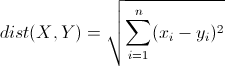

## 2、在scikit-learn库中使用k-近邻算法

- 分类问题：from sklearn.neighbors import KNeighborsClassifier

- 回归问题：from sklearn.neighbors import KNeighborsRegressor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 安装 pip install scikit-learn 
from sklearn.neighbors import KNeighborsClassifier

In [5]:
movie = pd.read_excel('./tests.xlsx', sheet_name=1)
movie

,电影名称,武打镜头,接吻镜头,分类情况
0,大话西游,36,1,动作片
1,杀破狼,43,2,动作片
2,前任3,0,10,爱情片
3,战狼2,59,1,动作片
4,泰坦尼克号,1,15,爱情片
5,星语心愿,2,19,爱情片


In [7]:
# pandas不能正常显示中文
plt.rcParams['font.sans-serif'] ='SimHei'
plt.rcParams['axes.unicode_minus'] = False

Text(2, 19, '星语心愿')

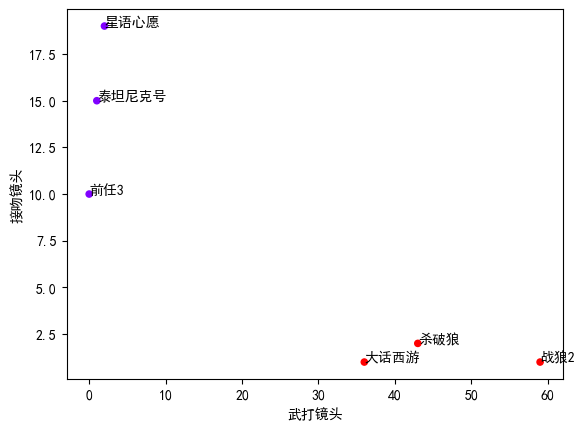

In [11]:
movie.plot(kind='scatter', x='武打镜头', y='接吻镜头', cmap='rainbow', c=[1, 1, 0, 1, 0, 0])
plt.text(36, 1, '大话西游')
plt.text(43, 2, '杀破狼')
plt.text(0, 10, '前任3')
plt.text(59, 1, '战狼2')
plt.text(1, 15, '泰坦尼克号')
plt.text(2, 19, '星语心愿')

In [ ]:
# 机器学习代码的套路. 
# 1. 准备好训练数据
# 2. 创建算法的实例对象
# 3. 使用算法的实例对象去训练数据
# 4. 准备测试数据, 用训练好的模型去预测
# 5. 评估, 分类: 准确率  回归: r2

In [16]:
# dataframe可以直接参与训练. 但是训练数据一定得是2维的. 一般推荐训练数据使用ndarray的格式. 
# 第一个维度表示样本数, 第二个维度表示特征数
X_train = movie[['武打镜头', '接吻镜头']].values
# 有监督学习, 必须要有标记结果. 一个训练样本, 必须对应一个标签. 
# 对y_train没有维度要求, 一般都是一维. 甚至不要求必须是数字(字符串在内部会转化成数字), 但是注意y_train不能是series
y_train = movie['分类情况'].values
display(X_train, y_train)

array([[36,  1],
       [43,  2],
       [ 0, 10],
       [59,  1],
       [ 1, 15],
       [ 2, 19]], dtype=int64)

array(['动作片', '动作片', '爱情片', '动作片', '爱情片', '爱情片'], dtype=object)

In [26]:
# n_neighbors=5 即K, 表示k取多少. 默认是5个. 大部分时候, 默认参数就够用
knn = KNeighborsClassifier()

In [27]:
# 训练
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
# 预测
# 准备预测数据
# 阿凡达, 速度与激情8, 哥斯拉大战金刚, 傲慢与偏见
# 训练数据长什么样子, 预测数据也得长什么样子. 
X_test = np.array([[35, 3], [40, 4], [40, 1], [0, 13]])

In [29]:
# 预测
knn.predict(X_test)

array(['动作片', '动作片', '动作片', '爱情片'], dtype=object)

### 0）一个最简单的例子

身高、体重、鞋子尺码数据对应性别

In [23]:
# 能不能预测, 不能乱来. 数据和标记之间最好是一定的关联. 
# 准备训练数据
# 创造数据
X_train = np.array([[180, 200, 43], [178, 135, 42], [160, 100, 37], [170, 156, 42], [174, 157, 42.5], [188, 120, 42], [175, 140, 42], [177, 146, 43], [158, 100, 38], [156, 120, 37], [162, 105, 37], [160, 90, 36], [158, 84, 37]])
y_train = np.array(['男', '男', '女', '男', '男', '男', '男', '男', '女', '女', '女', '女', '女'])

In [17]:
knn = KNeighborsClassifier()

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
# 预测
# 思考一下第四个数据为什么预测错了. 
# 建立对机器学习的正确认识. 预测会出错是很正常的现象. 
# 数据会影响预测结果. 
# 第四个为什么错了, 因为我们的训练数据中从来没遇到过160的男生的数据. 
X_test = np.array([[162, 112, 37], [160, 120, 37], [180, 120, 43], [160, 120, 40], [188, 120, 42]])
knn.predict(X_test)

# 你的训练数据尽量多样化, 

array(['女', '女', '男', '女', '男'], dtype='<U1')

In [21]:
# score 用于评估, 分类问题, 计算准确率 
knn.score(X_test, np.array(['女', '女', '男', '男', '男']))

0.8

In [24]:
# 一般不用训练数据去评估, 因为训练数据, 都已经认识了, 不能很好的反映模型的真正的水平. 
knn.score(X_train, y_train)

1.0

In [20]:
# 训练数据加上个子矮的男生的数据
X_train_add = np.array([[160, 120, 40], [159, 120, 40], [165, 130, 41]])
X_train = np.vstack((X_train, X_train_add))

In [8]:
X_train

array([[180. , 200. ,  43. ],
       [178. , 135. ,  42. ],
       [160. , 100. ,  37. ],
       [170. , 156. ,  42. ],
       [174. , 157. ,  42.5],
       [188. , 120. ,  42. ],
       [175. , 140. ,  42. ],
       [177. , 146. ,  43. ],
       [158. , 100. ,  38. ],
       [156. , 120. ,  37. ],
       [162. , 105. ,  37. ],
       [160. ,  90. ,  36. ],
       [158. ,  84. ,  37. ],
       [160. , 120. ,  40. ],
       [159. , 120. ,  40. ],
       [165. , 130. ,  41. ]])

In [9]:
y_train = np.hstack((y_train, np.array(['男', '男', '男'])))
y_train

array(['男', '男', '女', '男', '男', '男', '男', '男', '女', '女', '女', '女', '女',
       '男', '男', '男'], dtype='<U1')

In [10]:
# 准备了新的数据, 就用新的模型去训练
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
# 这回第四个数据就对了. 
knn.predict(X_test)

array(['女', '男', '男', '男', '男'], dtype='<U1')

### 1）用于分类

导包，机器学习的算法KNN、数据鸢尾花


In [2]:
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()

In [29]:
type(iris)

sklearn.utils.Bunch

In [30]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [31]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

获取训练样本

In [6]:
data = iris.data
target = iris.target
target_names = iris.target_names
feature_names = iris.feature_names

In [36]:
display(data.shape, target)

(150, 4)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [37]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [39]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [40]:
from pandas import DataFrame

In [41]:
df = DataFrame(data=data, columns=feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [42]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [43]:
knn = KNeighborsClassifier()
knn.fit(data, target)

KNeighborsClassifier()

In [44]:
from sklearn.model_selection import train_test_split

In [49]:
# 把原始数据分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [46]:
X_train.shape

(112, 4)

In [47]:
150 * 0.75

112.5

In [50]:
y_train

array([1, 2, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 1, 0, 1, 0,
       0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 1, 2, 2, 1, 2,
       2, 2, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0,
       0, 0, 0, 1, 2, 2, 2, 2, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 1, 1, 2, 2,
       0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0, 0, 1, 0, 2, 1, 0,
       0, 1])

In [51]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
y_ = knn.predict(X_test)

In [58]:
# 预测类别
# 在ndarray中, True在计算的时候会自动变成1, False变成0
(y_ == y_test).mean()

0.9736842105263158

In [53]:
knn.score(X_test, y_test)

0.9736842105263158

In [54]:
knn.score(X_train, y_train)

0.9732142857142857

绘制图形

In [60]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<AxesSubplot:>

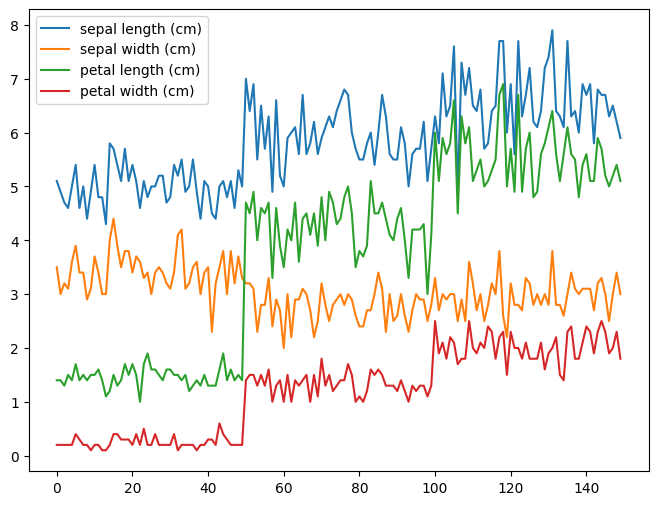

In [59]:
# 画出KNN的分类边界, 在直观上观察knn的特点, 加深对算法的印象
# 取2个特征. 
df.plot(figsize=(8, 6))

In [61]:
data.shape

(150, 4)

In [62]:
# 根据绘制的图形, 可以选择最后2个特征. 
data = data[:, 2:]

In [63]:
data.shape

(150, 2)

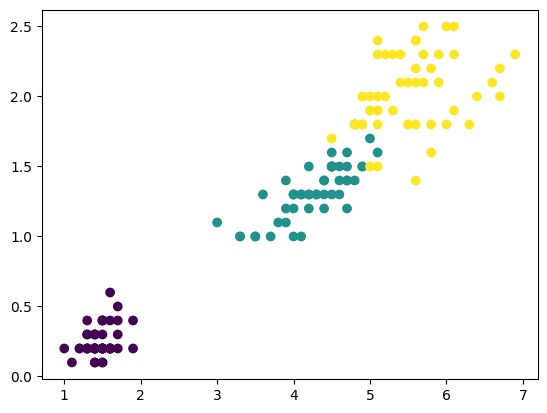

In [64]:
plt.scatter(data[:, 0], data[:, 1], c=target)

In [65]:
knn = KNeighborsClassifier()

In [66]:
knn.fit(data, target)

KNeighborsClassifier()

In [67]:
x = np.linspace(data[:, 0].min(), data[:, 0].max(), 1000)
y = np.linspace(data[:, 1].min(), data[:, 1].max(), 1000)

X, Y = np.meshgrid(x, y)

In [68]:
display(x, y)

array([1.        , 1.00590591, 1.01181181, 1.01771772, 1.02362362,
       1.02952953, 1.03543544, 1.04134134, 1.04724725, 1.05315315,
       1.05905906, 1.06496496, 1.07087087, 1.07677678, 1.08268268,
       1.08858859, 1.09449449, 1.1004004 , 1.10630631, 1.11221221,
       1.11811812, 1.12402402, 1.12992993, 1.13583584, 1.14174174,
       1.14764765, 1.15355355, 1.15945946, 1.16536537, 1.17127127,
       1.17717718, 1.18308308, 1.18898899, 1.19489489, 1.2008008 ,
       1.20670671, 1.21261261, 1.21851852, 1.22442442, 1.23033033,
       1.23623624, 1.24214214, 1.24804805, 1.25395395, 1.25985986,
       1.26576577, 1.27167167, 1.27757758, 1.28348348, 1.28938939,
       1.2952953 , 1.3012012 , 1.30710711, 1.31301301, 1.31891892,
       1.32482482, 1.33073073, 1.33663664, 1.34254254, 1.34844845,
       1.35435435, 1.36026026, 1.36616617, 1.37207207, 1.37797798,
       1.38388388, 1.38978979, 1.3956957 , 1.4016016 , 1.40750751,
       1.41341341, 1.41931932, 1.42522523, 1.43113113, 1.43703

array([0.1       , 0.1024024 , 0.1048048 , 0.10720721, 0.10960961,
       0.11201201, 0.11441441, 0.11681682, 0.11921922, 0.12162162,
       0.12402402, 0.12642643, 0.12882883, 0.13123123, 0.13363363,
       0.13603604, 0.13843844, 0.14084084, 0.14324324, 0.14564565,
       0.14804805, 0.15045045, 0.15285285, 0.15525526, 0.15765766,
       0.16006006, 0.16246246, 0.16486486, 0.16726727, 0.16966967,
       0.17207207, 0.17447447, 0.17687688, 0.17927928, 0.18168168,
       0.18408408, 0.18648649, 0.18888889, 0.19129129, 0.19369369,
       0.1960961 , 0.1984985 , 0.2009009 , 0.2033033 , 0.20570571,
       0.20810811, 0.21051051, 0.21291291, 0.21531532, 0.21771772,
       0.22012012, 0.22252252, 0.22492492, 0.22732733, 0.22972973,
       0.23213213, 0.23453453, 0.23693694, 0.23933934, 0.24174174,
       0.24414414, 0.24654655, 0.24894895, 0.25135135, 0.25375375,
       0.25615616, 0.25855856, 0.26096096, 0.26336336, 0.26576577,
       0.26816817, 0.27057057, 0.27297297, 0.27537538, 0.27777

In [69]:
display(X, Y)

array([[1.        , 1.00590591, 1.01181181, ..., 6.88818819, 6.89409409,
        6.9       ],
       [1.        , 1.00590591, 1.01181181, ..., 6.88818819, 6.89409409,
        6.9       ],
       [1.        , 1.00590591, 1.01181181, ..., 6.88818819, 6.89409409,
        6.9       ],
       ...,
       [1.        , 1.00590591, 1.01181181, ..., 6.88818819, 6.89409409,
        6.9       ],
       [1.        , 1.00590591, 1.01181181, ..., 6.88818819, 6.89409409,
        6.9       ],
       [1.        , 1.00590591, 1.01181181, ..., 6.88818819, 6.89409409,
        6.9       ]])

array([[0.1      , 0.1      , 0.1      , ..., 0.1      , 0.1      ,
        0.1      ],
       [0.1024024, 0.1024024, 0.1024024, ..., 0.1024024, 0.1024024,
        0.1024024],
       [0.1048048, 0.1048048, 0.1048048, ..., 0.1048048, 0.1048048,
        0.1048048],
       ...,
       [2.4951952, 2.4951952, 2.4951952, ..., 2.4951952, 2.4951952,
        2.4951952],
       [2.4975976, 2.4975976, 2.4975976, ..., 2.4975976, 2.4975976,
        2.4975976],
       [2.5      , 2.5      , 2.5      , ..., 2.5      , 2.5      ,
        2.5      ]])

In [71]:
X.ravel()

array([1.        , 1.00590591, 1.01181181, ..., 6.88818819, 6.89409409,
       6.9       ])

In [72]:
Y.ravel()

array([0.1, 0.1, 0.1, ..., 2.5, 2.5, 2.5])

In [73]:
X.reshape(-1)

array([1.        , 1.00590591, 1.01181181, ..., 6.88818819, 6.89409409,
       6.9       ])

In [74]:
zip(X.ravel(), Y.ravel())

In [75]:
# ravel可以快速把ndarray变成一维. 
XY = np.c_[X.ravel(), Y.ravel()]

In [76]:
display(XY.shape)

(1000000, 2)

In [77]:
# 二维平面上的所有的点
XY

array([[1.        , 0.1       ],
       [1.00590591, 0.1       ],
       [1.01181181, 0.1       ],
       ...,
       [6.88818819, 2.5       ],
       [6.89409409, 2.5       ],
       [6.9       , 2.5       ]])

In [79]:
y_ = knn.predict(XY)

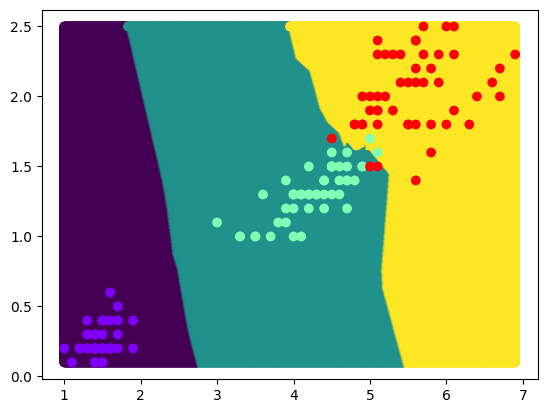

In [81]:
plt.scatter(XY[:, 0], XY[:, 1], c=y_)
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='rainbow')

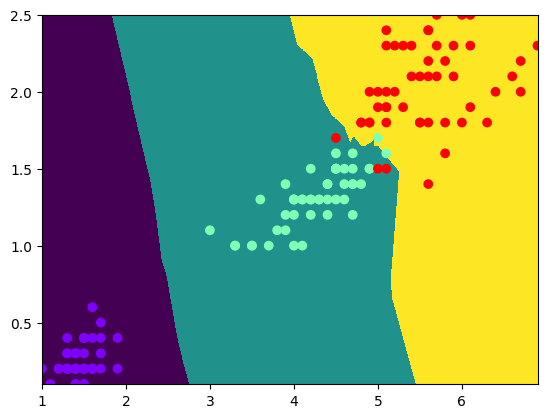

In [83]:
#  更快的画颜色块的方法
plt.pcolormesh(X, Y, y_.reshape(1000, 1000))
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='rainbow')

### 2）用于回归  
回归用于对趋势的预测

In [7]:
from sklearn.neighbors import KNeighborsRegressor

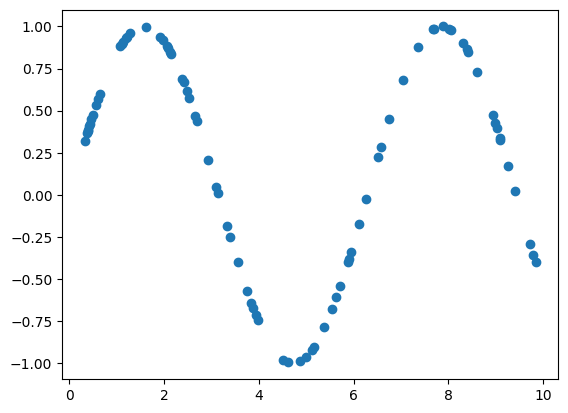

In [85]:
x = np.random.rand(80) * 10
y = np.sin(x)
plt.scatter(x, y)

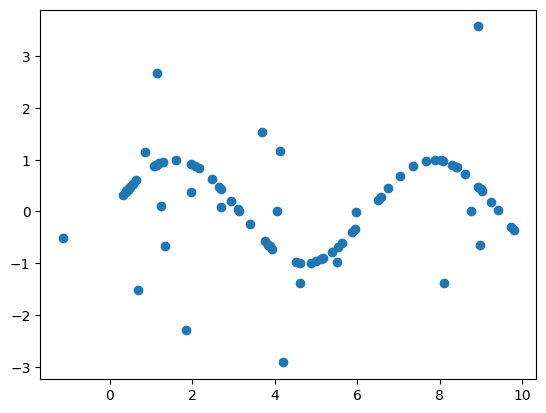

In [87]:
# 加点噪声点
x[::4] += np.random.randn(20)
y[::4] += np.random.randn(20)
plt.scatter(x, y)

In [88]:
knn = KNeighborsRegressor()
knn.fit(x.reshape(-1, 1), y)

KNeighborsRegressor()

In [90]:
X_test =np.linspace(0, 20, 100).reshape(-1, 1)
# 预测
y_ = knn.predict(X_test)

In [91]:
y_

array([ 0.3817573 ,  0.3817573 ,  0.40772041,  0.10947475,  0.32963352,
        1.29936955,  1.11401182,  0.46729648, -0.01272389,  0.17810187,
        0.14496988,  0.72546737,  0.48655557,  0.36080756,  0.2462626 ,
        0.15523893,  0.30905464,  0.15363404, -0.12055393, -0.21377512,
       -0.62811507, -0.68922082, -1.02059718, -1.0586555 , -1.04686229,
       -0.91061613, -0.90942368, -0.79054741, -0.6892487 , -0.40489192,
       -0.22420953, -0.04644679,  0.12275633,  0.50340118,  0.50340118,
        0.50340118,  0.79865397,  0.90603562,  0.96527007,  0.51449505,
        0.49834427,  0.4437042 ,  0.6706872 ,  1.12728848,  0.84367774,
        0.78348707,  0.0729104 , -0.01087844, -0.01087844, -0.01087844,
       -0.01087844, -0.01087844, -0.01087844, -0.01087844, -0.01087844,
       -0.01087844, -0.01087844, -0.01087844, -0.01087844, -0.01087844,
       -0.01087844, -0.01087844, -0.01087844, -0.01087844, -0.01087844,
       -0.01087844, -0.01087844, -0.01087844, -0.01087844, -0.01

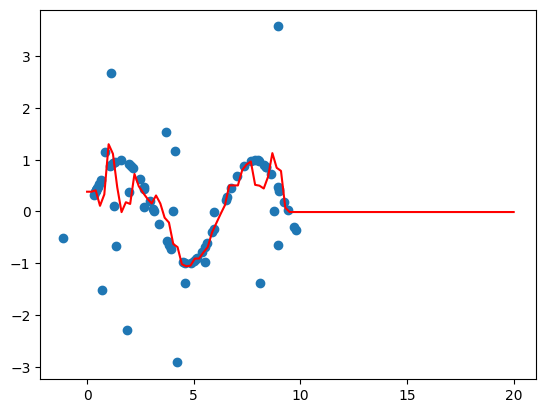

In [92]:
plt.scatter(x, y)
plt.plot(X_test, y_, c='r')

In [93]:
y_test = np.sin(X_test)

In [94]:
# 回归的得分 和分类不一样. 
knn.score(X_test, y_test)

0.36748549040586154

In [96]:
knn.score(x.reshape(-1, 1), y)

0.37162386893113286

In [ ]:
# 回归的评估指标不是准确率. 默认的回归评估指标是R方 R^2

In [97]:
-7000 + 2700 - 7000  + 2950 + 2850 + 1000 + 2900  + 2900 + 2800 + 2950 + 2600

9650

In [98]:
2900 + 2950 + 2850 - 7000 - 7000 + 2900 + 2900 + 2750 + 2950 + 2950 -7000

2150

In [99]:
2750 + 2900 + 2700 + 2900 + 2900  - 5050  - 7000 + 2900 + 950 + 2800 + 2900

11650

In [101]:
-5200 + 2950 + 2900 -6050 -4100 + 2750 + 2950 -6000  + 2850 -6050

-13000

### 练习
人类动作识别  
步行，上楼，下楼，坐着，站立和躺着  
![](stand-sit-run.jpg)  
数据采集每个人在腰部穿着智能手机，进行了六个活动（步行，上楼，下楼，坐着，站立和躺着）。采用嵌入式加速度计和陀螺仪，以50Hz的恒定速度捕获3轴线性加速度和3轴角速度，来获取数据

导入数据

In [3]:
X_train = np.load('../data/动作分析/x_train.npy')
X_test = np.load('../data/动作分析/x_test.npy')
y_train = np.load('../data/动作分析/y_train.npy')
y_test = np.load('../data/动作分析/y_test.npy')

In [4]:
display(X_train.shape, X_test.shape, y_train.shape, y_test)

(7352, 561)

(2947, 561)

(7352,)

array([5, 5, 5, ..., 2, 2, 2], dtype=int64)

In [5]:
np.unique(y_test)

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [6]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_ = knn.predict(X_test)
knn.score(X_test, y_test)

0.9015948422124194

In [8]:
label = {1:'WALKING', 2:'WALKING UPSTAIRS', 3:'WALKING DOWNSTAIRS',4:'SITTING', 5:'STANDING', 6:'LAYING'}

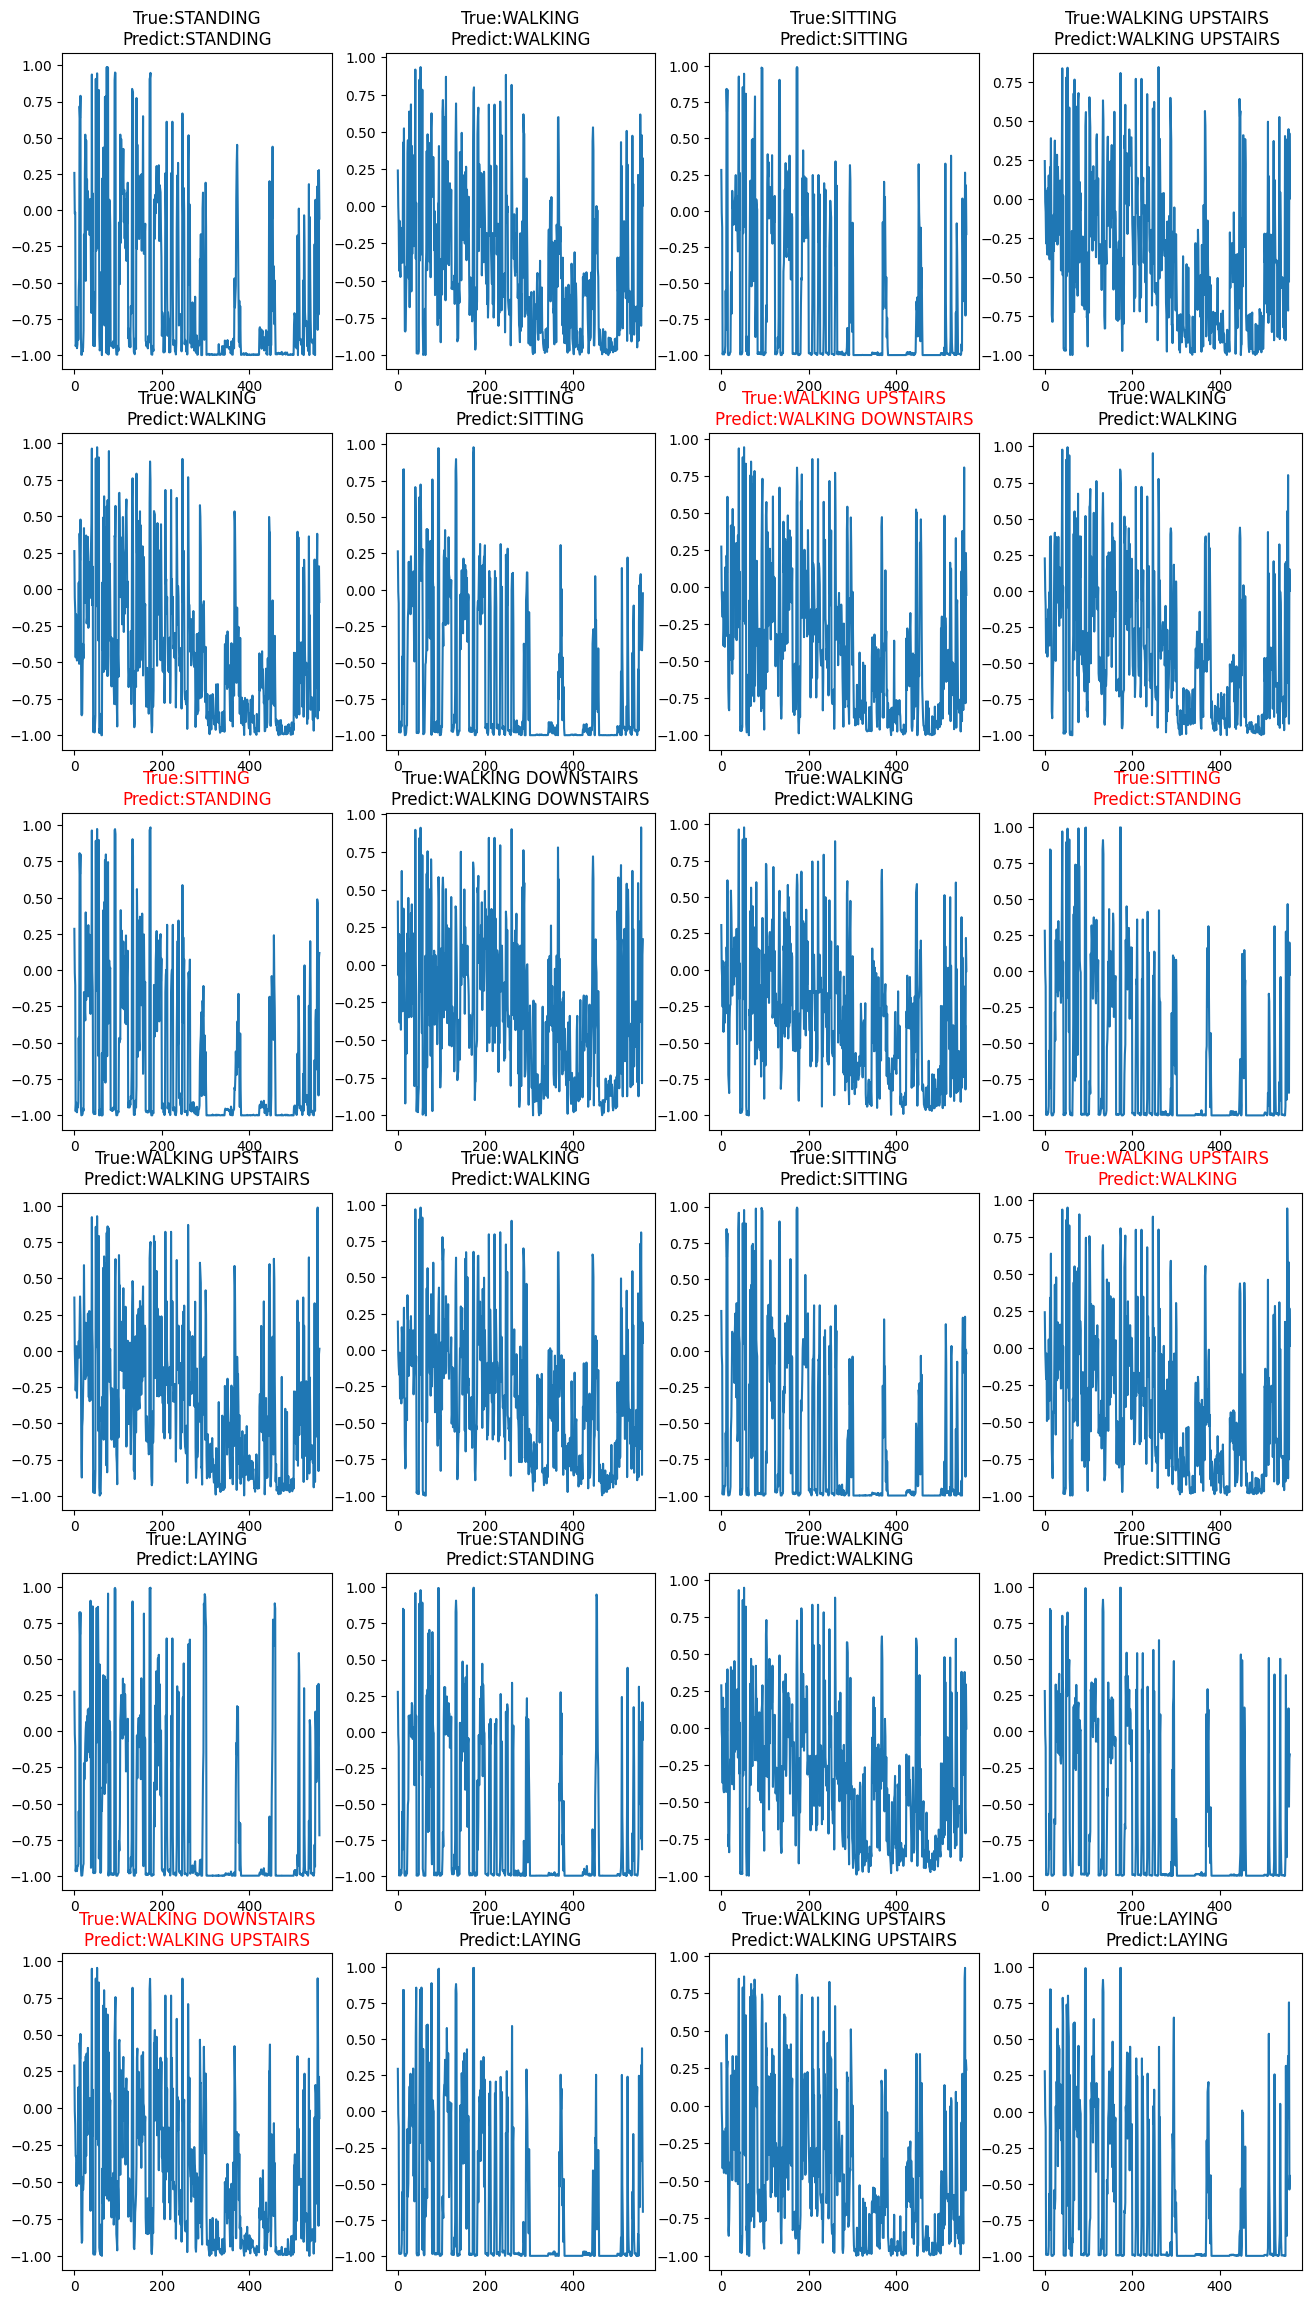

In [13]:
# 先规划好要画多少个图. 画6行4列, 总共24个. 
plt.figure(figsize=(4 * 4, 4.8 * 6))
for i in range(24):
    axes = plt.subplot(6, 4, i +1)
    axes.plot(X_test[i * 100])
    
    if y_test[i * 100] != y_[i * 100]:
        axes.set_title('True:%s\nPredict:%s' % (label[y_test[i * 100]], label[y_[i * 100]]), fontdict=dict(size=12, color='r'))
    else:
        axes.set_title('True:%s\nPredict:%s' % (label[y_test[i * 100]], label[y_[i * 100]]))

In [14]:
# 癌症
# 读取数据, 发现是\t的分隔符
cancer = pd.read_csv('../data/cancer.csv', sep='\t')

In [17]:
cancer.tail(10)

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_max,symmetry_max,fractal_max
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


In [18]:
# B 表示良性肿瘤: benign 
# M 表示恶性肿瘤: malignant 
target = cancer.Diagnosis.values
data = cancer.iloc[:, 2:].copy().values

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# 数据量很少的时候, 建议不要按比例了. 尽量多给一些训练数据. 
data.shape

(569, 30)

In [21]:
# test_size给整数的时候, 就是指定test具体是多少个. 
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=69)

In [22]:
X_train.shape

(500, 30)

In [23]:
y_train

array(['B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B

In [24]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
y_ = knn.predict(X_test)

In [26]:
knn.score(X_test, y_test)

0.9420289855072463

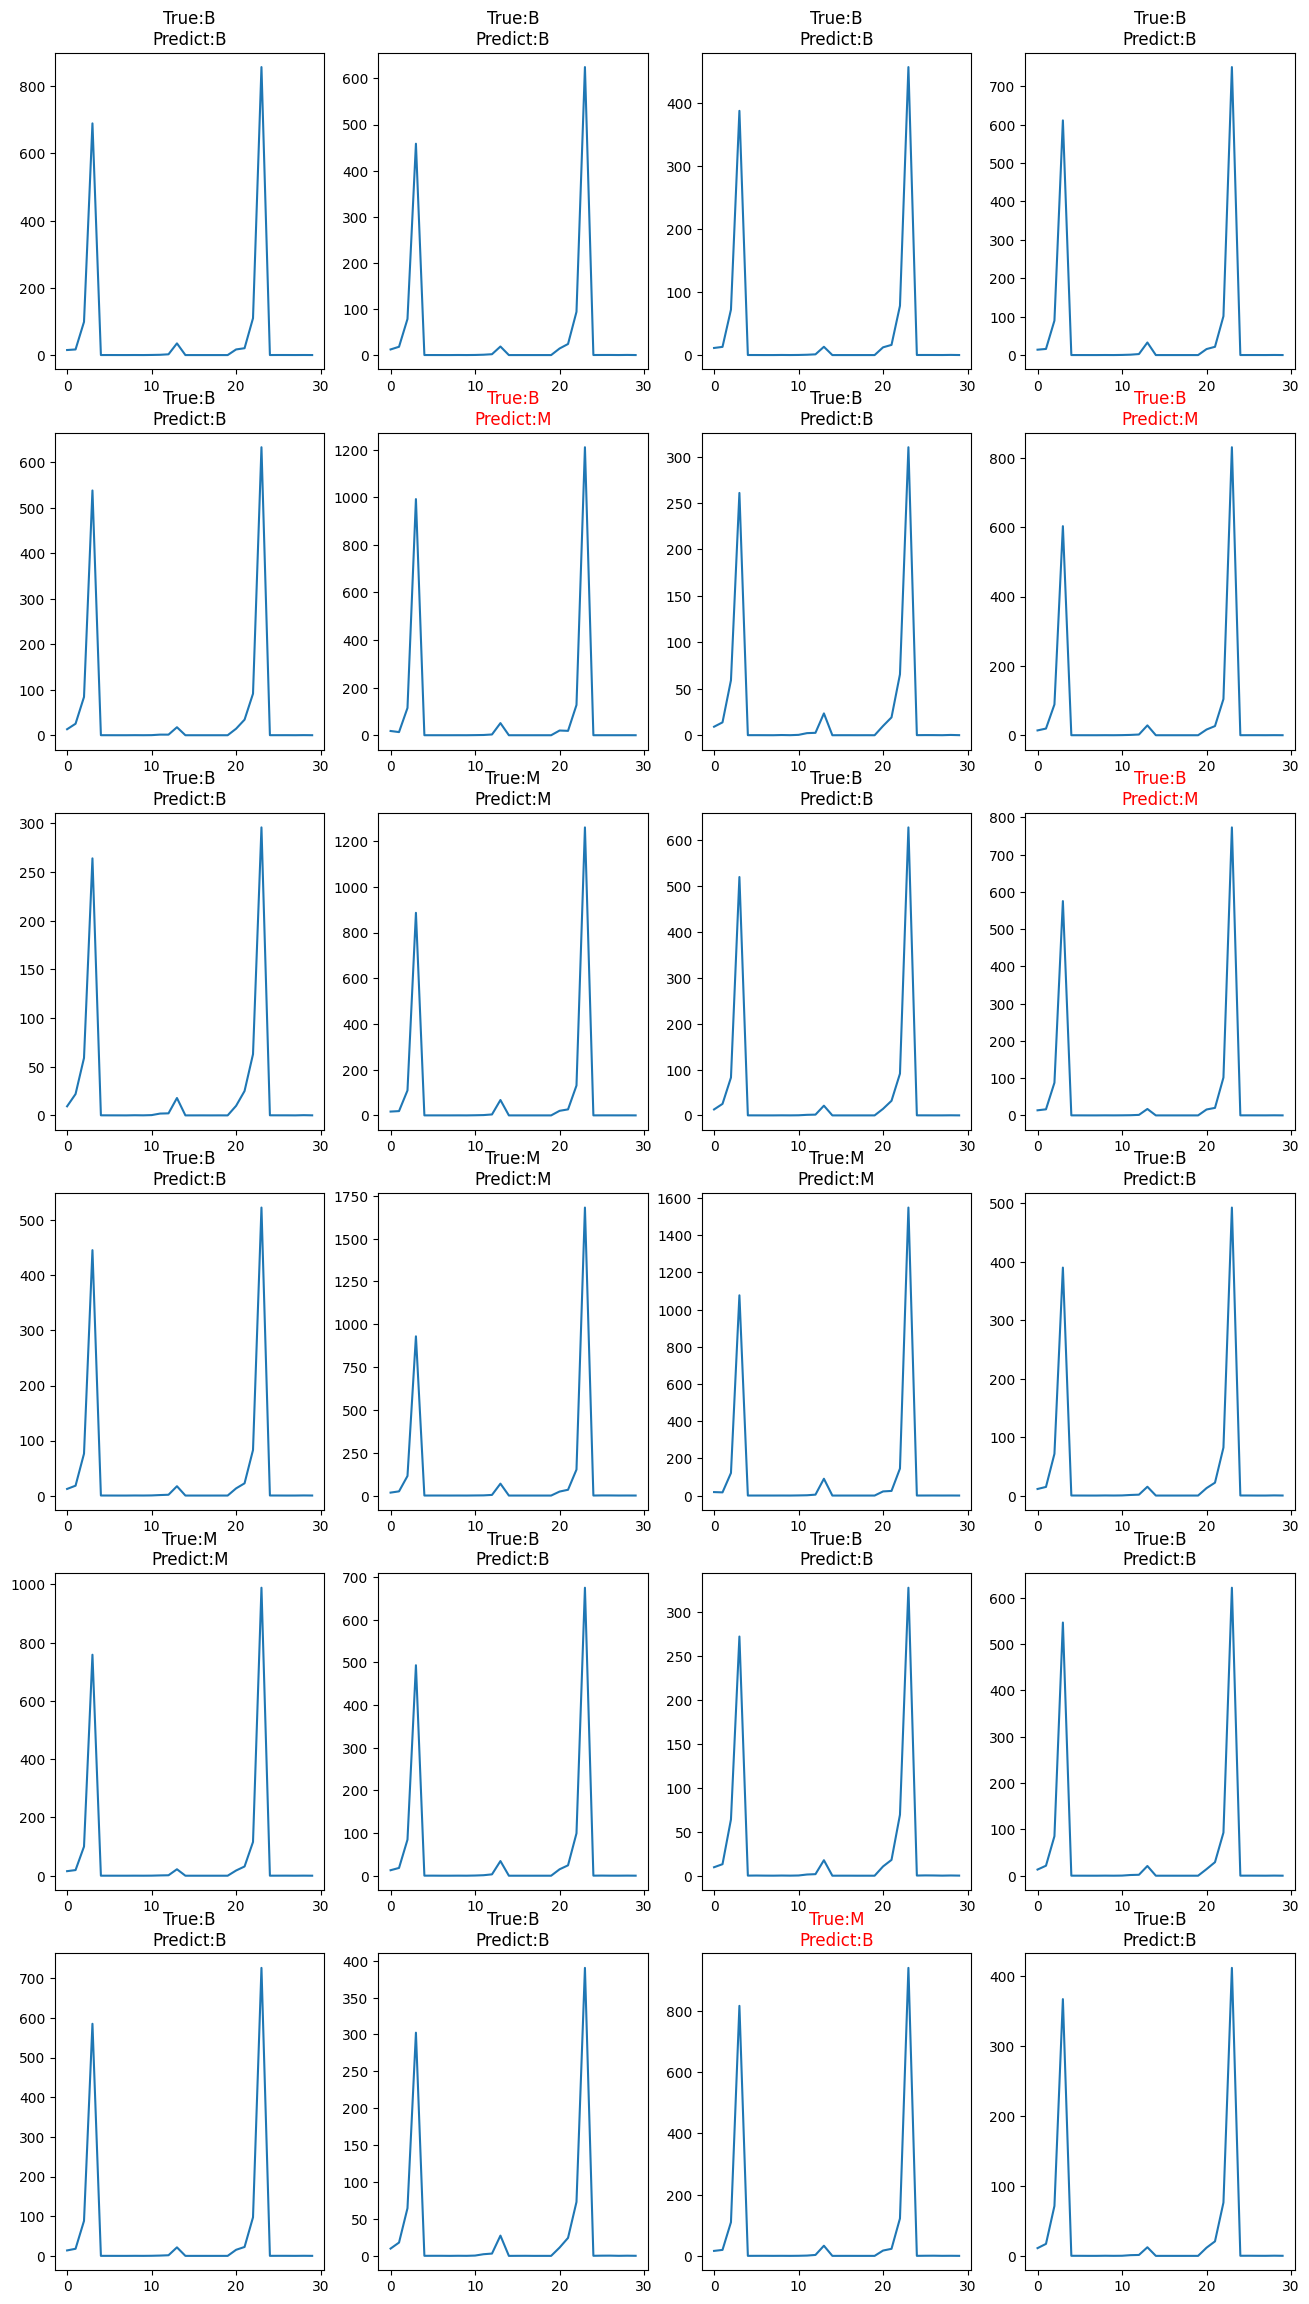

In [27]:
plt.figure(figsize=(4 * 4, 4.8 * 6))
for i in range(24):
    axes = plt.subplot(6, 4, i +1)
    axes.plot(X_test[i])
    
    if y_test[i] != y_[i]:
        axes.set_title('True:%s\nPredict:%s' % (y_test[i], y_[i]), fontdict=dict(size=12, color='r'))
    else:
        axes.set_title('True:%s\nPredict:%s' % (y_test[i], y_[i]))

In [28]:
# 这些图都长的差不多. 可视化效果就不太好. 考虑用其他的手段展示结果. 
# 交叉表, 以表格的形式来展示预测和真实的结果
pd.crosstab(index=y_, columns=y_test, rownames=['预测值'], colnames=['真实值'], margins=True)

真实值,B,M,All
预测值,,,
B,38,1,39
M,3,27,30
All,41,28,69


In [29]:
(38 + 27) / 69

0.9420289855072463

## 3、作业

#### 1、预测年收入是否大于50K美元

读取adult.txt文件，最后一列是年收入，并使用KNN算法训练模型，然后使用模型预测一个人的年收入是否大于50

获取年龄、教育程度、职位、每周工作时间作为机器学习数据  
获取薪水作为对应结果

In [31]:
adult = pd.read_csv('../data/adults.txt')

In [32]:
adult.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [37]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final_weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [33]:
adult.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [34]:
features = ['age', 'workclass','education_num','marital_status', 'occupation',  'race', 'sex', 'hours_per_week', 'native_country']

In [35]:
data = adult[features].copy()
target = adult.salary.values.copy()

In [36]:
data.shape

(32561, 9)

In [38]:
data.head()

,age,workclass,education_num,marital_status,occupation,race,sex,hours_per_week,native_country
0,39,State-gov,13,Never-married,Adm-clerical,White,Male,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,White,Male,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba


In [41]:
workclass = data.workclass.unique()
workclass

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [47]:
np.where(workclass == 'State-gov')[0][0]

0

In [44]:
np.argwhere(workclass == 'State-gov')[0, 0]

0

In [48]:
def convert(item):
    index = np.argwhere(workclass == item)[0, 0]
    return index

In [49]:
data['workclass'] = data['workclass'].map(convert)

In [51]:
data.workclass.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [52]:
data.columns

Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'race', 'sex', 'hours_per_week', 'native_country'],
      dtype='object')

In [53]:
cols = ['marital_status', 'occupation', 'race', 'sex', 'native_country']
for col in cols:
    uni = data[col].unique()
    def convert(item):
        index = np.argwhere(uni == item)[0, 0]
        return index
    data[col] = data[col].map(convert)

In [54]:
data.head()

,age,workclass,education_num,marital_status,occupation,race,sex,hours_per_week,native_country
0,39,0,13,0,0,0,0,40,0
1,50,1,13,1,1,0,0,13,0
2,38,2,9,2,2,0,0,40,0
3,53,2,7,1,2,1,0,40,0
4,28,2,13,1,3,1,1,40,1


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   education_num   32561 non-null  int64
 3   marital_status  32561 non-null  int64
 4   occupation      32561 non-null  int64
 5   race            32561 non-null  int64
 6   sex             32561 non-null  int64
 7   hours_per_week  32561 non-null  int64
 8   native_country  32561 non-null  int64
dtypes: int64(9)
memory usage: 2.2 MB


In [56]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [57]:
knn = KNeighborsClassifier()

In [58]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
y_ = knn.predict(X_test)

In [60]:
# 得分
knn.score(X_test, y_test)

0.7888465790443434